In [15]:
## PROJET D'IDENTIFICATION D’UNE LANGUE COURS “RÉSEAUX DE NEURONES POUR LA RECONNAISSANCE DE L’ORAL ET APPLICATION LINGUISTIQUES”
# Fabienne Auffret, Marya Borovikova & Sheherazade Nineb

# En plus de notre étude appliquant ce qui a été vu en cours: deux modèles tirés du net ont été testés: 
##Deep Learning for Audio Classification (kapre) et ##Classification d'images (fleurs)

# L'un orienté classification audio et l'autre classification d'images. 
#  Cependant, une fois les audios traités ces deux problématiques deviennent équivalentes.

In [ ]:
# Voici les liens:
# https://github.com/seth814/Audio-Classification#training
# et https://github.com/Momotoculteur/Image-classification

# Ils ont été adaptés à notre corpus afin de pouvoir détecter une langue parmis: l'arabe, le français, le hindi et le russe.

In [ ]:
# Ce modèle bien que plus complexe (mais très bien expliqué dans les tutos) effectue un prétraitement des audios
# en considérant l'enveloppe et un seuil en-dessous duquel il ne prend plus en considération les zones dites "mortes".
# Il nous a semblé intéressant de tester (même si le test a surtout été la prise en main ici de ces codes) ce type de prétraitement 


In [ ]:
# Le premier modèle donne les résultats suivants sur notre corpus

In [ ]:
# L'optimiseur utilisé dans les trois cas est Adam , sur des couches de types: lstm, conv1D et conv2D.

In [43]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
log_csvs = sorted(os.listdir('C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/logs'))
print(log_csvs)

['conv1d_history.csv', 'conv2d_history.csv', 'lstm_history.csv', 'y_pred.npy', 'y_true.npy']


In [45]:
labels = ['Conv 1D', 'Conv 2D', 'LSTM']
colors = ['r', 'm', 'c']

C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/logs\conv1d_history.csv
conv1d_history.csv
r
C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/logs\conv2d_history.csv
conv2d_history.csv
m
C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/logs\lstm_history.csv
lstm_history.csv
c


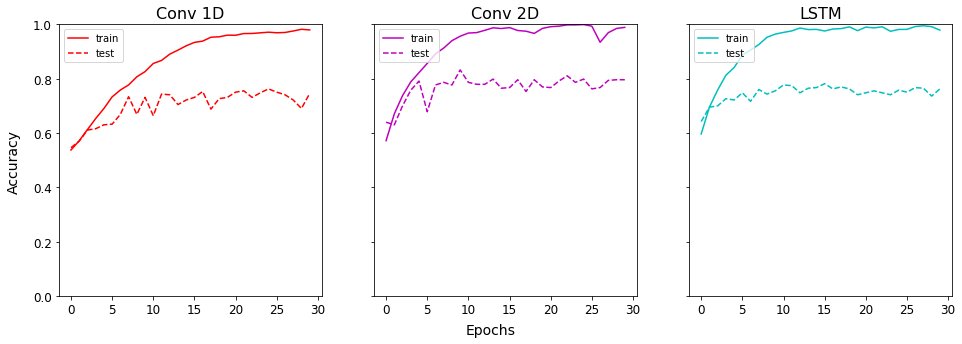

<Figure size 432x288 with 0 Axes>

In [46]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,5))

for i, (fn, label, c) in enumerate(zip(log_csvs, labels, colors)):
    csv_path = os.path.join('..', 'C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/logs', fn)#logs
    print(csv_path)
    print(fn)
    print(c)
    df = pd.read_csv(csv_path)
    ax[i].set_title(label, size=16)
    ax[i].plot(df.accuracy, color=c, label='train')
    ax[i].plot(df.val_accuracy, ls='--', color=c, label='test')
    ax[i].legend(loc='upper left')
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].set_ylim([0,1.0])

fig.text(0.5, 0.02, 'Epochs', ha='center', size=14)
fig.text(0.08, 0.5, 'Accuracy', va='center', rotation='vertical', size=14)
plt.show()
plt.savefig('accuracyByModel')

In [47]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from glob import glob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

In [48]:
y_pred = np.load('C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/logs/y_pred.npy')
y_true = np.load('C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/logs/y_true.npy')

In [55]:
classes = sorted(os.listdir('C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/wavfiles'))

n_classes = len(set(y_true))
print(n_classes), len(y_true)
y_hot = to_categorical(y_true)
print(n_classes), print(len(y_true)),print(y_hot)
y_pred_le = np.argmax(y_pred, axis=1)
y_pred_labels = [classes[x] for x in y_pred_le]
y_true_labels = [classes[x] for x in y_true]

n_classes = len(set(y_true))


4
4
2397
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
['ar' 'fr' 'hi' 'ru']


In [56]:
wav_paths = glob('{}/**'.format('C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/wavfiles'), recursive=True)
wav_paths = sorted([x.replace(os.sep, '/') for x in wav_paths if '.wav' in x])

classes = sorted(os.listdir('C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/audio_classifier_langues/wavfiles'))
labels = [os.path.split(x)[0].split('/')[-1] for x in wav_paths]

unique_labels = np.unique(labels)
print(unique_labels)

['ar' 'fr' 'hi' 'ru']


In [57]:
#print(y_true), print(y_true_labels), print(y_pred)
#print(len(y_true)), print(len(y_true_labels)), print(len(y_pred))

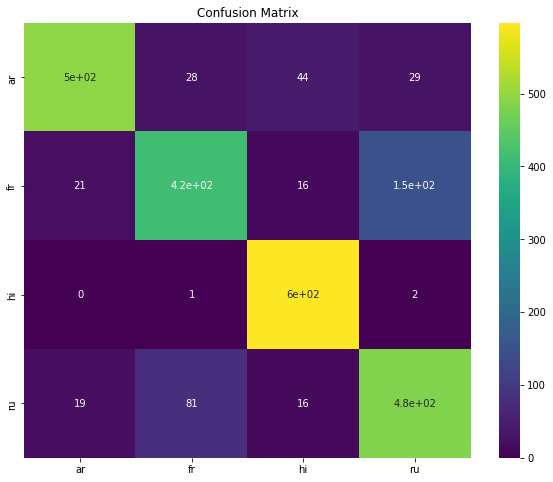

<Figure size 432x288 with 0 Axes>

In [58]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=unique_labels)
df_cm = pd.DataFrame(conf_mat, index = unique_labels,
                     columns = unique_labels)
plt.figure(figsize = (10,8))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='viridis')
plt.show()
plt.savefig('matrixConfusion')

In [ ]:
# Le second modèle donne les résultats suivants sur notre corpus

In [ ]:
# ce modèle est plus classsique dans son prétraitement et utilise comme optimizer un Adamax

In [59]:
pathLogs = 'C:\\Nineb\\M2-TAL\\CNN\\S2_reconnaissanceVoix\\Image-classification-master\\audio_classifier\\logs\\log_moModel.csv'
pathSaveGraph = 'C:\\Nineb\\M2-TAL\\CNN\\S2_reconnaissanceVoix\\Image-classification-master\\audio_classifier\\graph'
pathLogs,pathSaveGraph

('C:\\Nineb\\M2-TAL\\CNN\\S2_reconnaissanceVoix\\Image-classification-master\\audio_classifier\\logs\\log_moModel.csv',
 'C:\\Nineb\\M2-TAL\\CNN\\S2_reconnaissanceVoix\\Image-classification-master\\audio_classifier\\graph')

In [60]:
def plot(X, Y, Y2, title, xLabel, yLabel, legendLoc, pathSaveGraph):
    """
    # Fonction d'affichage de graph
    :param X: correspond au nombre d'époch
    :param Y: correspond a la courbe accuracy
    :param Y2: correspond a la courbe loss
    :param title: titre du graphique
    :param xLabel: label des abcisses
    :param yLabel: label des ordonnees
    :param legendLoc: legende
    :param pathSaveGraph: chemin de sauvegarde pour les graphiques
    """

   #On trace nos differentes courbes
    plt.plot(Y)
    plt.plot(Y2)
   #titre du graph, legende...
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend(['train', 'val'], loc=legendLoc)
   #Pour avoir un courbe propre qui demarre à 0
    plt.xlim(xmin=0.0, xmax=max(X))
    plt.savefig(pathSaveGraph +'\\' + title)
    plt.figure()
    #plt.show()

In [78]:
def displayGraph(pathLog,pathSaveGraph):
    """
    # Fonction permettant de creer nos graph de suivi de metriques
    :param pathLog: chemin du CSV contenant nos metrics
    :param pathSaveGraph: chemin de destination pour sauvegarder nos 4 graphiques en jpg
    """

   #data = pd.read_csv("C:/Nineb/M2-TAL/CNN/S2_reconnaissanceVoix/Image-classification-master/audio_classifier/logs/log_moModel.csv")
    data = pd.read_csv(pathLog)
    # split into input (X) and output (Y) variables
    plot(data['epoch'], data['accuracy'], data['val_accuracy'], 'TRAIN_VAL_Accuracy', 'Epoch', 'Accuracy', 'upper left',pathSaveGraph)
    plot(data['epoch'], data['loss'], data['val_loss'], 'TRAIN_VAL_Loss', 'Epoch', 'Loss', 'upper left',pathSaveGraph)
    

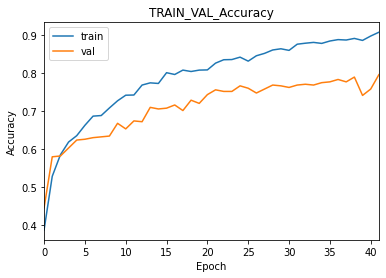

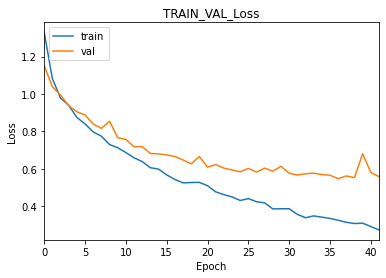

<Figure size 432x288 with 0 Axes>

In [62]:
displayGraph(pathLogs,pathSaveGraph)

In [63]:
def generateMatrix(model, datasetTestPath, imageSize, destinationMatrix):
	"""
	# Fonction qui va construire notre matrice de confusion
	:param model: chemin du modèle à charger pour realiser la prediction
	:param datasetTestPath: chemin du dataset contenant nos images de test
	:param imageSize: definit la taille de l'ensemble de nos images
	:param destinationMatrix: définit le chemin ou va être sauvegardé notre matrice sous format d'image
	:return:
	"""

	#Les tableaux contenanrt les predictions
	y_true = []
	y_pred = []

	total = 0
	success = 0
	index = 0

	print('\nEvaluation :')
	#On parcours notre dataset de test
	for root, dirs, files in os.walk(datasetTestPath):
		for mydir in dirs:
			for sample in tqdm(os.listdir(root + '\\' + mydir), "Prediction de la classe '{}'".format(mydir)):

				sample_path = root + '\\' + mydir + '\\' + sample
				#Chargement et traitement de l'image
				img = Image.open(sample_path)
				img.load()
				img = img.resize(size=imageSize)
				img = np.asarray(img) / 255.
				#On reshape pour etre de la forme (nbImage,hauteurImage,largeurImage,nbCanaux)
				img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
				#Prediction de notre modele
				pred = np.argmax(model.predict(img))

				total += 1
				if pred == index:
					success += 1

				y_true.append(index)
				y_pred.append(pred)

			index += 1

	#Precision de notre modele sur notre jeu de test en entier
	accuracy = (success / total) * 100.
	print('\nPrecision : {0:.3f}%'.format(accuracy))


	cnf_matrix = confusion_matrix(y_true, y_pred)
	np.set_printoptions(precision=2)

	# Plot normalized confusion matrix
	plt.figure()

	cmap = plt.cm.Blues
#	classes = ['marguerite', 'pissenlit', 'rose', 'tournesol', 'tulipe']
	classes = ['ar', 'fr', 'hi', 'ru']
    # classes = ['ar', 'fr', 'rose', 'hi', 'ru']
	title = 'Confusion matrix'

	cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

	#Legende de notre matrice
	plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation=45)
	plt.yticks(tick_marks, classes)

	fmt = '.2f'
	thresh = cnf_matrix.max() / 2.
	for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
		plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center", color="white" if cnf_matrix[i, j] > thresh else "black")

	plt.ylabel('True label')
	plt.xlabel('Predicted label')
	plt.tight_layout()

	#On sauvegarde notre matrice en image
	plt.savefig(destinationMatrix + '\\' + 'confusionMatrix')

In [74]:
from keras.models import load_model
from tqdm import tqdm
from PIL import Image
import itertools

Prediction de la classe 'ar': 100%|██████████| 5/5 [00:00<00:00, 26.53it/s]


Evaluation :



Prediction de la classe 'ru': 100%|██████████| 5/5 [00:00<00:00, 34.57it/s]



Precision : 70.000%


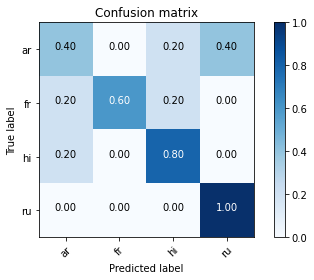

In [75]:
#modelPath = '.\\trainedModel\\moModel.hdf5'
#datasetTestPath = '.\\datasetTest'
#destinationMatrix = '.\\graph'
Path = 'C:\\Nineb\\M2-TAL\\CNN\\S2_reconnaissanceVoix\\Image-classification-master\\audio_classifier'
datasetTestPath = Path + '\\datasetTest'
destinationMatrix = Path + '\\graph'
modelPath = Path + '\\trainedModel\\moModel.hdf5'

imageSize = (50, 50)
model = load_model(modelPath)

generateMatrix(model, datasetTestPath, imageSize, destinationMatrix)

In [79]:

def predict(modelPath,imagePath, imageSize, label):
    """
    # Fonction qui permet de convertir une image en array, de charger le modele et de lui injecter notre image pour une prediction
    :param modelPath: chemin du modèle au format hdf5
    :param imagePath: chemin de l'image pour realiser une prediction
    :param imageSize: défini la taille de l'image. IMPORTANT : doit être de la même taille que celle des images
    du dataset d'entrainements
    :param label: nom de nos 5 classes de sortie
    """

    start = time.time()

    # Chargement du modele
    print("Chargement du modèle :\n")
    model = load_model(modelPath)
    print("\nModel chargé.")

    #Chargement de notre image et traitement
    data = []
    img = Image.open(imagePath)
    img.load()
    img = img.resize(size=imageSize)
    img = np.asarray(img) / 255.
    data.append(img)
    data = np.asarray(data)

    #On reshape pour correspondre aux dimensions de notre modele
    # Arg1 : correspond au nombre d'image que on injecte
    # Arg2 : correspond a la largeur de l'image
    # Arg3 : correspond a la hauteur de l'image
    # Arg4 : correspond au nombre de canaux de l'image (1 grayscale, 3 couleurs)
    dimension = data[0].shape

    #Reshape pour passer de 3 à 4 dimension pour notre réseau
    data = data.astype(np.float32).reshape(data.shape[0], dimension[0], dimension[1], dimension[2])

    #On realise une prediction
    prediction = model.predict(data)


    #On recupere le numero de label qui a la plus haut prediction
    maxPredict = np.argmax(prediction)

    #On recupere le mot correspondant à l'indice precedent
    word = label[maxPredict]
    pred = prediction[0][maxPredict] * 100.
    end = time.time()


    #On affiche les prédictions
    print()
    print('----------')
    print(" Prediction :")
    for i in range(0, len(label)):
        print('     ' + label[i] + ' : ' + "{0:.2f}%".format(prediction[0][i] * 100.))

    print()
    print('RESULTAT : ' + word + ' : ' + "{0:.2f}%".format(pred))
    print('temps prediction : ' + "{0:.2f}secs".format(end-start))

    
    print('----------')

In [ ]:
# Ici nous avons isolé une image russe pour test final.

# On constate que le modèle reconnait la langue avec un pourcentage de 85.03%

In [81]:
import time

modelPath = Path +'\\trainedModel\\moModel.hdf5'
imagePath =  Path +'\\testImage\\common_voice_ru_23407397.png'
imageSize = (50,50)
label = ['ar', 'fr', 'hi', 'ru']

predict(modelPath, imagePath,imageSize, label)

Chargement du modèle :


Model chargé.

----------
 Prediction :
     ar : 5.47%
     fr : 0.01%
     hi : 9.49%
     ru : 85.03%

RESULTAT : ru : 85.03%
temps prediction : 0.16secs
----------
